In [1]:
#For further clarification and understanding, please reach out me at tham166@yahoo.com for additional details.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#OPEN DATA by the Government of Malaysia
URL_DATA = 'https://storage.data.gov.my/commodities/fuelprice.parquet'

df = pd.read_parquet(URL_DATA)

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

df = df[df["series_type"] == 'level']

df['Year_Month'] = df['date'].dt.strftime('%y%m')

df_2 = df.groupby('Year_Month').agg({
    'ron95': 'mean',
    'ron97': 'mean',
    'diesel': 'mean'
}).reset_index()

df_2.columns = ['Date', 'RON95', 'RON97', 'Diesel']

In [ ]:
print(df)

    series_type       date  ron95  ron97  diesel Year_Month
0         level 2017-03-30   2.13   2.41    2.11       1703
1         level 2017-04-06   2.16   2.43    2.08       1704
2         level 2017-04-13   2.24   2.52    2.16       1704
3         level 2017-04-20   2.27   2.54    2.21       1704
4         level 2017-04-27   2.21   2.49    2.14       1704
..          ...        ...    ...    ...     ...        ...
323       level 2023-10-05   2.05   3.37    2.15       2310
324       level 2023-10-12   2.05   3.37    2.15       2310
325       level 2023-10-19   2.05   3.47    2.15       2310
326       level 2023-10-26   2.05   3.47    2.15       2310
327       level 2023-11-02   2.05   3.47    2.15       2311

[328 rows x 6 columns]


In [ ]:
print(df_2)

    Date  RON95   RON97  Diesel
0   1703  2.130  2.4100  2.1100
1   1704  2.220  2.4950  2.1475
2   1705  2.080  2.3600  2.0125
3   1706  1.986  2.2500  1.9120
4   1707  1.975  2.2275  1.9550
..   ...    ...     ...     ...
75  2307  2.050  3.3700  2.1500
76  2308  2.050  3.3700  2.1500
77  2309  2.050  3.3700  2.1500
78  2310  2.050  3.4200  2.1500
79  2311  2.050  3.4700  2.1500

[80 rows x 4 columns]


In [ ]:
pivot_table = df.pivot_table(values=['ron97', 'ron95', 'diesel'], aggfunc={'ron97': ['max', 'min', 'median', 'mean', 'var', 'std'], 'ron95': ['max', 'min', 'median', 'mean', 'var', 'std'], 'diesel': ['max', 'min', 'median', 'mean', 'var', 'std']}, index='series_type').round(2)
pivot_table

diesel                               ron95                     \
               max  mean median  min   std   var   max  mean median   min   
series_type                                                                 
level         2.34  2.09   2.15  1.4  0.16  0.03  2.38  2.02   2.05  1.25   

                       ron97                                
             std   var   max mean median   min   std   var  
series_type                                                 
level        0.2  0.04  4.84  2.8    2.6  1.55  0.69  0.48

Oct 2023:
Among the fuel types, RON97 boasts the highest maximum price, followed by RON95 and Diesel.
When it comes to the minimum price, RON95 takes the lead, followed by Diesel and RON97.
On average, the price of RON97 stands at RM2.8, RON95 at RM2.02, and Diesel at RM2.09.
In the middle price range, RON97 is at RM2.6, RON95 at RM2.05, and Diesel at RM2.15.
Diesel prices exhibit a higher degree of consistency and predictability, with a variance of 0.03 and a standard deviation of RM0.16.
RON95 prices can also be considered relatively consistent and predictable, with a variance of 0.04 and a standard deviation of RM0.2.
In contrast, RON97 prices show significant variation from the average, with a high variance of 0.48 and a standard deviation of 0.69.

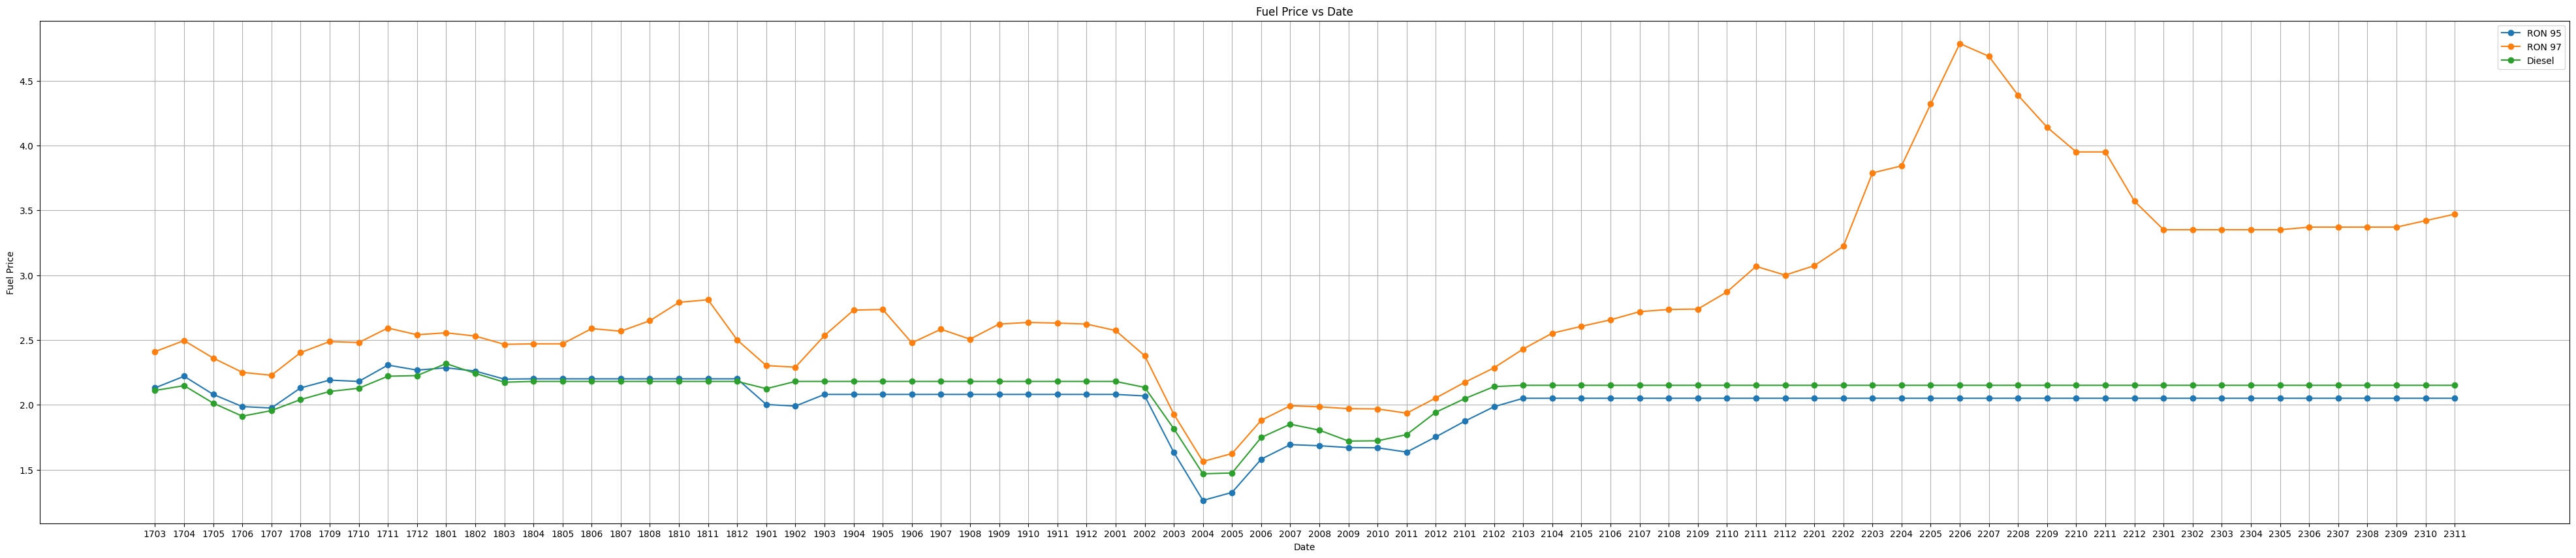

In [ ]:
# Create the time series plot
plt.figure(figsize=(50, 10))
plt.plot(df_2['Date'], df_2['RON95'], marker = 'o', linestyle='-', label="RON 95")
plt.plot(df_2['Date'], df_2['RON97'], marker = 'o', linestyle='-', label="RON 97")
plt.plot(df_2['Date'], df_2['Diesel'], marker = 'o', linestyle='-', label="Diesel")
plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.title('Fuel Price vs Date')
plt.grid(True)
plt.legend()
plt.show()

Oct 2023:
Upon closer inspection of the chart, it becomes apparent that RON97 experienced a significant price surge in the year 2022. This occurrence followed a global uptick in fuel prices, eventually reaching its peak.

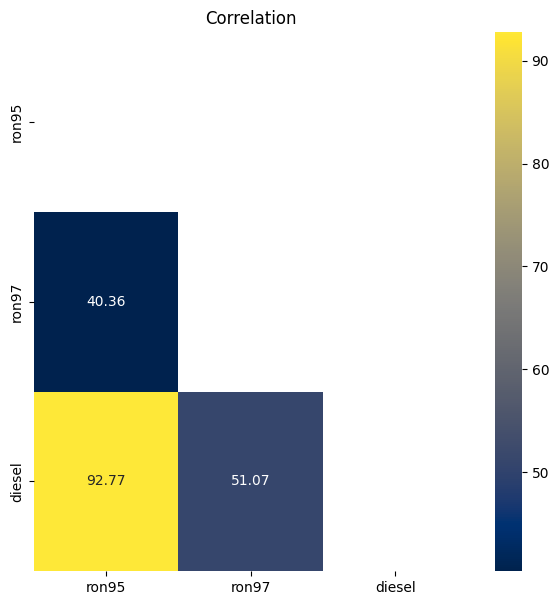

In [ ]:
# correlation plot
plt.figure(figsize=(7, 7))
data_num = df.select_dtypes(include=['number'])
corr = data_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr * 100, cmap = 'cividis', annot= True, fmt='.2f', mask=mask)
plt.title('Correlation')
plt.show()

Oct 2023: There is a positive correlation between all fuel types.
The correlation between RON95 and Diesel is notably stronger than that between RON97 and Diesel.